In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Análise das Diferenças
-------------------------------------------------------
Comparação A vs B:
  Média da Diferença: 0.0374
  Intervalo de Confiança de 95%: [0.0095, 0.0652]

Comparação A vs C:
  Média da Diferença: -0.0069
  Intervalo de Confiança de 95%: [-0.0322, 0.0184]

Comparação A vs D:
  Média da Diferença: -0.0711
  Intervalo de Confiança de 95%: [-0.0983, -0.0439]

-------------------------------------------------------


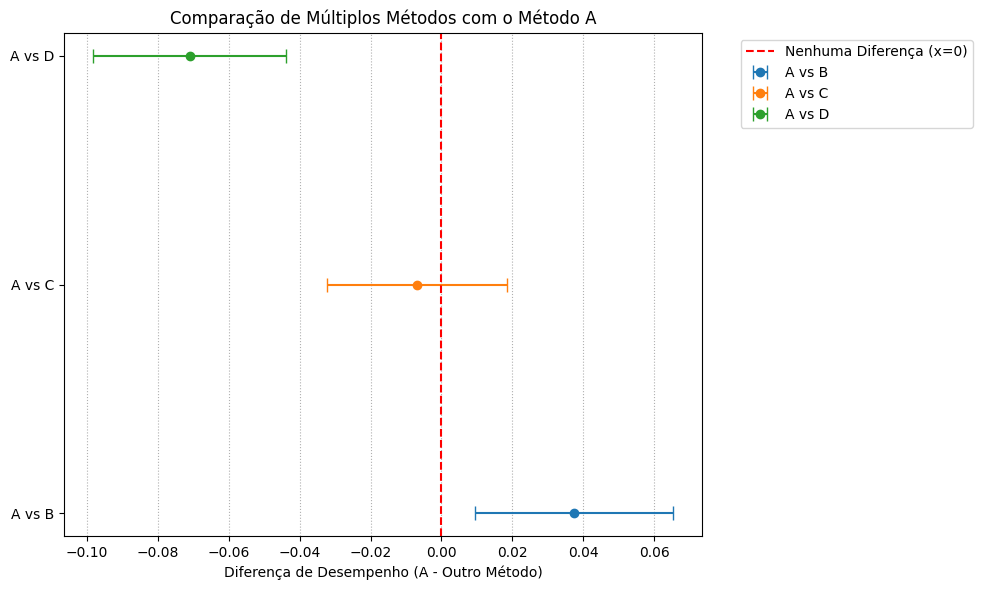

In [ ]:
np.random.seed(42)
resultados_metodo_A = np.random.normal(loc=0.85, scale=0.1, size=100)
resultados_metodo_B = np.random.normal(loc=0.80, scale=0.1, size=100) # pior que o A
resultados_metodo_C = np.random.normal(loc=0.84, scale=0.1, size=100) # bem parecido com o A
resultados_metodo_D = np.random.normal(loc=0.90, scale=0.1, size=100) # melhor que o A

comparacoes = {
    "A vs B": resultados_metodo_A - resultados_metodo_B,
    "A vs C": resultados_metodo_A - resultados_metodo_C,
    "A vs D": resultados_metodo_A - resultados_metodo_D
}

resultados_finais = {}
for nome, amostra_diferenca in comparacoes.items():
    media = np.mean(amostra_diferenca)
    intervalo = st.t.interval(confidence=0.95, # nível de confiança de 95%
                                df=len(amostra_diferenca)-1, # graus de liberdade
                                loc=media,
                                scale=st.sem(amostra_diferenca)) # erro padrão da média (EPM)
    resultados_finais[nome] = {'media': media, 'intervalo': intervalo}

print("Análise das Diferenças")
print("-" * 55)
for nome, resultado in resultados_finais.items():
    print(f"Comparação {nome}:")
    print(f"  Média da Diferença: {resultado['media']:.4f}")
    print(f"  Intervalo de Confiança de 95%: [{resultado['intervalo'][0]:.4f}, {resultado['intervalo'][1]:.4f}]\n")
print("-" * 55)


fig, ax = plt.subplots(figsize=(10, 6))

nomes_comparacoes = list(resultados_finais.keys())
posicoes_y = np.arange(len(nomes_comparacoes)) # posições y para cada comparação [0, 1, 2, ...]

for i, nome in enumerate(nomes_comparacoes):
    resultado = resultados_finais[nome]
    media = resultado['media']
    limite_inferior, limite_superior = resultado['intervalo']
    erro = media - limite_inferior
    # x é onde a bola será plotada, y é a posição vertical, xerr é o erro, capsize é o tamanho das "tampas"
    ax.errorbar(x=media, y=posicoes_y[i], xerr=erro, fmt='o', capsize=5,
                label=nome, color=f'C{i}')

ax.axvline(x=0, color='red', linestyle='--', label='Nenhuma Diferença (x=0)') # linha vermelha tracejada no x=0

# organiza o gráfico
ax.set_yticks(posicoes_y)
ax.set_yticklabels(nomes_comparacoes)
ax.set_xlabel('Diferença de Desempenho (A - Outro Método)')
ax.set_title('Comparação de Múltiplos Métodos com o Método A')
ax.grid(axis='x', linestyle=':')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()


plt.savefig('intervalo_confianca_multiplo.png')